## Viz motifs

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [62]:
all_motifs = pd.DataFrame({})

# Mowgli
motifs_path = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/enrich/top_motifs_mowgli/"
for i in range(50):
    motifs = pd.read_csv(motifs_path + f"motifs_{i}.csv", index_col=0)
    motifs = motifs[motifs["p.adjust"] < .05]
    motifs = motifs[motifs["motif"].str.startswith("MA")]
    motifs["dim"] = i
    motifs["method"] = "mowgli"
    all_motifs = pd.concat((all_motifs, motifs))

# MOFA
motifs_path = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/enrich/top_motifs_mofa/"
for i in range(15):
    motifs = pd.read_csv(motifs_path + f"motifs_{i}.csv", index_col=0)
    motifs = motifs[motifs["p.adjust"] < .05]
    motifs = motifs[motifs["motif"].str.startswith("MA")]
    motifs["dim"] = i
    motifs["method"] = "mofa"
    all_motifs = pd.concat((all_motifs, motifs))

In [63]:
all_motifs.head()

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust,dim,method
MA0765.3,MA0765.3,64,2107,32.0,21.072107,1.518595,1.769612e-04,ETV5,0.046247,1,mowgli
MA0162.4,MA0162.4,143,5967,71.5,59.675968,1.198137,2.960768e-04,EGR1,0.046247,1,mowgli
MA0742.2,MA0742.2,156,6699,78.0,66.996700,1.164236,3.772570e-04,KLF12,0.049106,1,mowgli
MA1634.1,MA1634.1,85,2498,42.5,24.982498,1.701191,3.379940e-08,BATF,0.000026,2,mowgli
MA0835.2,MA0835.2,85,2502,42.5,25.022502,1.698471,3.654668e-08,BATF3,0.000026,2,mowgli


## Count the motifs

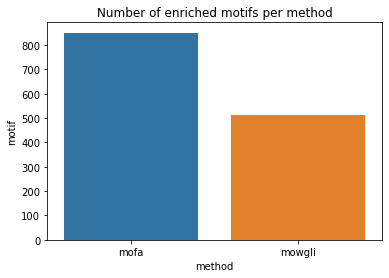

In [64]:
plt.title("Number of enriched motifs per method")
sns.barplot(data=all_motifs.groupby("method")["motif"].count().reset_index(), x="method", y="motif")
plt.show()

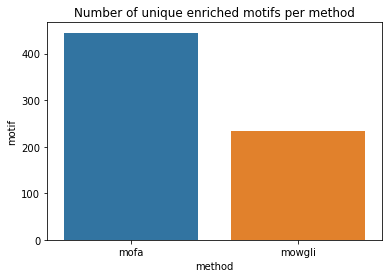

In [65]:
plt.title("Number of unique enriched motifs per method")
sns.barplot(data=all_motifs.groupby("method")["motif"].nunique().reset_index(), x="method", y="motif")
plt.show()

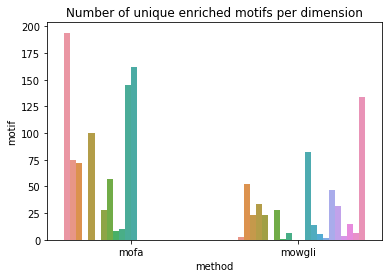

In [66]:
fig, ax = plt.subplots(1, 1)
sns.barplot(data=all_motifs.groupby(["method", "dim"])["motif"].nunique().reset_index(), x="method", hue='dim', y="motif", ax=ax)
ax.set_title("Number of unique enriched motifs per dimension")
ax.get_legend().remove()
plt.show()

## Check specificity

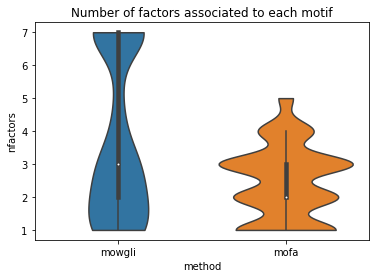

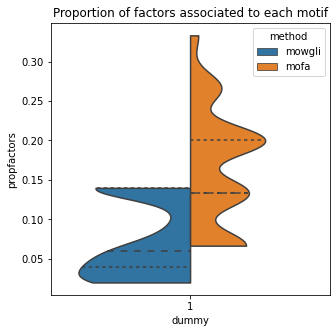

In [67]:
all_motifs["nfactors"] = 0
nfactors = all_motifs.groupby(["motif", "method"])["motif"].count()
all_motifs.set_index(["motif", "method"], inplace=True)
all_motifs.loc[nfactors.index, "nfactors"] = nfactors
all_motifs.reset_index(inplace=True)

plt.title("Number of factors associated to each motif")
sns.violinplot(data=all_motifs, x="method", y="nfactors", cut=0)
plt.show()

all_motifs["ndim"] = 0
all_motifs.loc[all_motifs["method"] == "mofa", "ndim"] = 15
all_motifs.loc[all_motifs["method"] == "mowgli", "ndim"] = 50
all_motifs["propfactors"] = all_motifs["nfactors"] / all_motifs["ndim"]
all_motifs["dummy"] = 1

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title("Proportion of factors associated to each motif")
sns.violinplot(
    data=all_motifs,
    x="dummy",
    hue="method",
    y="propfactors",
    split=True,
    ax=ax,
    inner="quart",
    cut=0,
)
plt.show()


In [68]:
selectivity_mofa = (all_motifs[all_motifs["method"] == "mofa"]["motif"].nunique() + 15) / (2*all_motifs[all_motifs["method"] == "mofa"]["motif"].count())
selectivity_mowgli = (all_motifs[all_motifs["method"] == "mowgli"]["motif"].nunique() + 50) / (2*all_motifs[all_motifs["method"] == "mowgli"]["motif"].count())
print("Selectivity of top MOFA+: {:.4f}".format(selectivity_mofa))
print("Selectivity of Mowgli: {:.4f}".format(selectivity_mowgli))

Selectivity of top MOFA+: 0.2703
Selectivity of Mowgli: 0.2769


## Biology-driven check

In [80]:
idx = (all_motifs["method"] == "mofa")
idx &= (all_motifs["dim"] == 2)
all_motifs.loc[idx][:10]

,motif,method,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust,dim,nfactors,ndim,propfactors,dummy
780,MA0806.1,mofa,81,789,40.5,26.300000,1.539924,0.000004,TBX4,0.000942,2,2,15,0.133333,1
781,MA0807.1,mofa,81,789,40.5,26.300000,1.539924,0.000004,TBX5,0.000942,2,2,15,0.133333,1
782,MA1565.1,mofa,110,1208,55.0,40.266667,1.365894,0.000009,TBX18,0.001620,2,1,15,0.066667,1
783,MA0802.1,mofa,85,860,42.5,28.666667,1.482558,0.000010,TBR1,0.001620,2,2,15,0.133333,1
784,MA1566.2,mofa,86,897,43.0,29.900000,1.438127,0.000032,TBX3,0.003840,2,2,15,0.133333,1
785,MA0800.1,mofa,77,777,38.5,25.900000,1.486486,0.000034,EOMES,0.003840,2,1,15,0.066667,1
786,MA0805.1,mofa,90,970,45.0,32.333333,1.391753,0.000073,TBX1,0.006172,2,2,15,0.133333,1
787,MA1928.1,mofa,91,987,45.5,32.900000,1.382979,0.000083,BNC2,0.006172,2,3,15,0.200000,1
788,MA0655.1,mofa,71,720,35.5,24.000000,1.479167,0.000102,JDP2,0.006650,2,3,15,0.200000,1
789,MA0476.1,mofa,88,962,44.0,32.066667,1.372141,0.000168,FOS,0.010007,2,3,15,0.200000,1


In [70]:
idx = (all_motifs["method"] == "mofa")
idx &= (all_motifs["dim"] == 0)
all_motifs.loc[idx][:10]

,motif,method,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust,dim,nfactors,ndim,propfactors,dummy
511,MA1981.1,mofa,155,1693,77.5,56.433333,1.373302,1.066690e-10,ZNF530,1.666170e-07,0,5,15,0.333333,1
512,MA0101.1,mofa,82,665,41.0,22.166667,1.849624,4.282214e-10,REL,1.853415e-07,0,1,15,0.066667,1
513,MA1637.1,mofa,103,937,51.5,31.233333,1.648879,5.327459e-10,EBF3,1.853415e-07,0,3,15,0.200000,1
514,MA0499.2,mofa,111,1055,55.5,35.166667,1.578199,9.492522e-10,MYOD1,1.853415e-07,0,1,15,0.066667,1
515,MA0597.2,mofa,128,1316,64.0,43.866667,1.458967,2.460581e-09,THAP1,3.843427e-07,0,2,15,0.133333,1
516,MA1102.2,mofa,111,1073,55.5,35.766667,1.551724,3.010911e-09,CTCFL,4.275494e-07,0,3,15,0.200000,1
517,MA1976.1,mofa,144,1577,72.0,52.566667,1.369689,5.117503e-09,ZNF320,5.974411e-07,0,3,15,0.200000,1
518,MA0107.1,mofa,86,755,43.0,25.166667,1.708609,8.777363e-09,RELA,9.140161e-07,0,2,15,0.133333,1
519,MA0493.2,mofa,149,1670,74.5,55.666667,1.338323,9.791559e-09,KLF1,9.559010e-07,0,3,15,0.200000,1
520,MA1929.1,mofa,114,1146,57.0,38.200000,1.492147,1.916761e-08,CTCF,1.652614e-06,0,3,15,0.200000,1


In [71]:
idx = (all_motifs["method"] == "mowgli")
idx &= (all_motifs["dim"] == 2)
all_motifs.loc[idx][:10]

,motif,method,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust,dim,nfactors,ndim,propfactors,dummy
3,MA1634.1,mowgli,85,2498,42.5,24.982498,1.701191,3.379940e-08,BATF,0.000026,2,7,50,0.14,1
4,MA0835.2,mowgli,85,2502,42.5,25.022502,1.698471,3.654668e-08,BATF3,0.000026,2,7,50,0.14,1
5,MA0462.2,mowgli,85,2518,42.5,25.182518,1.687679,4.983148e-08,BATF::JUN,0.000026,2,7,50,0.14,1
6,MA0655.1,mowgli,63,1644,31.5,16.441644,1.915867,8.002423e-08,JDP2,0.000031,2,7,50,0.14,1
7,MA1132.1,mowgli,60,1602,30.0,16.021602,1.872472,4.258692e-07,JUN::JUNB,0.000133,2,6,50,0.12,1
8,MA1928.1,mowgli,79,2402,39.5,24.022402,1.644299,6.721535e-07,BNC2,0.000154,2,7,50,0.14,1
9,MA1633.2,mowgli,69,2082,34.5,20.822082,1.656895,4.131049e-06,BACH1,0.000587,2,7,50,0.14,1
10,MA0476.1,mowgli,76,2426,38.0,24.262426,1.566208,8.855520e-06,FOS,0.000988,2,7,50,0.14,1
11,MA1144.1,mowgli,64,1926,32.0,19.261926,1.661308,1.028386e-05,FOSL2::JUND,0.001003,2,7,50,0.14,1
12,MA0805.1,mowgli,89,3016,44.5,30.163016,1.475317,1.077694e-05,TBX1,0.001003,2,3,50,0.06,1


In [82]:
idx = (all_motifs["method"] == "mowgli")
idx &= (all_motifs["dim"] == 33)
all_motifs.loc[idx][:10]

,motif,method,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust,dim,nfactors,ndim,propfactors,dummy
320,MA1929.1,mowgli,136,5320,68.0,53.205321,1.278068,0.000012,CTCF,0.004815,33,2,50,0.04,1
321,MA0499.2,mowgli,112,4200,56.0,42.004200,1.333200,0.000039,MYOD1,0.008040,33,1,50,0.02,1
322,MA0081.2,mowgli,145,5898,72.5,58.985899,1.229107,0.000041,SPIB,0.008040,33,3,50,0.06,1
323,MA0103.3,mowgli,119,4586,59.5,45.864586,1.297297,0.000063,ZEB1,0.008346,33,3,50,0.06,1
324,MA0597.2,mowgli,133,5305,66.5,53.055306,1.253409,0.000068,THAP1,0.008346,33,1,50,0.02,1
325,MA0101.1,mowgli,72,2397,36.0,23.972397,1.501727,0.000078,REL,0.008346,33,1,50,0.02,1
326,MA0598.3,mowgli,127,5072,63.5,50.725073,1.251846,0.000159,EHF,0.013065,33,4,50,0.08,1
327,MA0788.1,mowgli,77,2695,38.5,26.952695,1.428429,0.000215,POU3F3,0.014317,33,1,50,0.02,1
328,MA0507.2,mowgli,67,2266,33.5,22.662266,1.478228,0.000262,POU2F2,0.015163,33,1,50,0.02,1
329,MA1982.1,mowgli,92,3428,46.0,34.283428,1.341756,0.000353,ZNF574,0.017807,33,1,50,0.02,1
